## **SENTIMENT ANALYSIS OF TWEETS**:

In [19]:
import pandas as pd
import numpy as np

In [20]:
train_data=pd.read_csv('twitter_training.csv')
train_data.head()

,Index,Company,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [21]:
test_data=pd.read_csv('twitter_validation.csv')
test_data.head()

,Index,Company,Sentiment,Tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [22]:
import re
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
def remove_emojis(text):
    if isinstance(text, str):
        emoji_pattern = re.compile(
            "["u"\U0001F600-\U0001F64F"
            u"\U0001F300-\U0001F5FF"
            u"\U0001F680-\U0001F6FF"
            u"\U0001F700-\U0001F77F"
            u"\U0001F780-\U0001F7FF"
            u"\U0001F800-\U0001F8FF"
            u"\U0001F900-\U0001F9FF"
            u"\U0001FA00-\U0001FA6F"
            u"\U0001FA70-\U0001FAFF"
            "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    return ''


In [25]:
def preprocess_text(text):

    if isinstance(text, str):

        text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

        text = remove_emojis(text)

        text = re.sub(r'\@\w+|\#', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        text = text.lower()

        tokens = text.split()

        tokens = [word for word in tokens if word not in stop_words]

        text = ' '.join(tokens)

        if not text.strip():
            return "empty"
    else:

        text = "empty"

    return text


In [26]:

train_data['cleaned_tweet'] = train_data['Tweet'].apply(preprocess_text)
train_data = train_data[train_data['cleaned_tweet'] != 'empty']

test_data['cleaned_tweet'] = test_data['Tweet'].apply(preprocess_text)
test_data = test_data[test_data['cleaned_tweet'] != 'empty']


In [27]:
train_data.head()

,Index,Company,Sentiment,Tweet,cleaned_tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting borderlands murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder


In [28]:
test_data.head()

,Index,Company,Sentiment,Tweet,cleaned_tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,mentioned facebook struggling motivation go ru...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,pay word functions poorly chromebook
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...
4,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping americans face really commi...


In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_data['encoded_sentiment'] = label_encoder.fit_transform(train_data['Sentiment'])
test_data['encoded_sentiment'] = label_encoder.transform(test_data['Sentiment'])


train_labels = train_data['encoded_sentiment'].values


test_labels = test_data['encoded_sentiment'].values

print("Sentiment classes and their labels:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

print(train_labels[:20])
print(test_labels[:20])

Sentiment classes and their labels: {'Irrelevant': 0, 'Negative': 1, 'Neutral': 2, 'Positive': 3}
[3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 3 3 3]
[0 2 1 1 2 1 3 3 3 1 3 3 1 2 1 3 3 1 3 1]


In [30]:
vocab_size = 5000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")


tokenizer.fit_on_texts(train_data['cleaned_tweet'])


train_sequences = tokenizer.texts_to_sequences(train_data['cleaned_tweet'])
test_sequences = tokenizer.texts_to_sequences(test_data['cleaned_tweet'])


max_length = 100
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

print(train_padded[:5])

[[   3   81   65 1504    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [ 262    1  293    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_padded,train_labels, test_size=0.2, random_state=42)


### **Keras model which uses RNN model (Bidirectional LSTM)**

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

vocab_size = 10000
embedding_dim = 200
max_length = 100

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length, mask_zero=True),
    Bidirectional(LSTM(units=128, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(units=64, return_sequences=True)),
    Dropout(0.3),
    GlobalMaxPooling1D(),
    Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(units=4, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [34]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32, callbacks=[early_stopping, reduce_lr])

Epoch 1/5
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 1372s 759ms/step - accuracy: 0.5540 - loss: 1.1641 - val_accuracy: 0.7067 - val_loss: 0.8269 - learning_rate: 0.0010
Epoch 2/5
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 1441s 781ms/step - accuracy: 0.7562 - loss: 0.6960 - val_accuracy: 0.7598 - val_loss: 0.6781 - learning_rate: 0.0010
Epoch 3/5
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 1407s 751ms/step - accuracy: 0.8341 - loss: 0.4930 - val_accuracy: 0.7949 - val_loss: 0.5939 - learning_rate: 0.0010
Epoch 4/5
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 1441s 773ms/step - accuracy: 0.8695 - loss: 0.3906 - val_accuracy: 0.8108 - val_loss: 0.5566 - learning_rate: 0.0010
Epoch 5/5
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 1392s 767ms/step - accuracy: 0.8946 - loss: 0.3193 - val_accuracy: 0.8237 - val_loss: 0.5341 - learning_rate: 0.0010


### **Plotting the values**

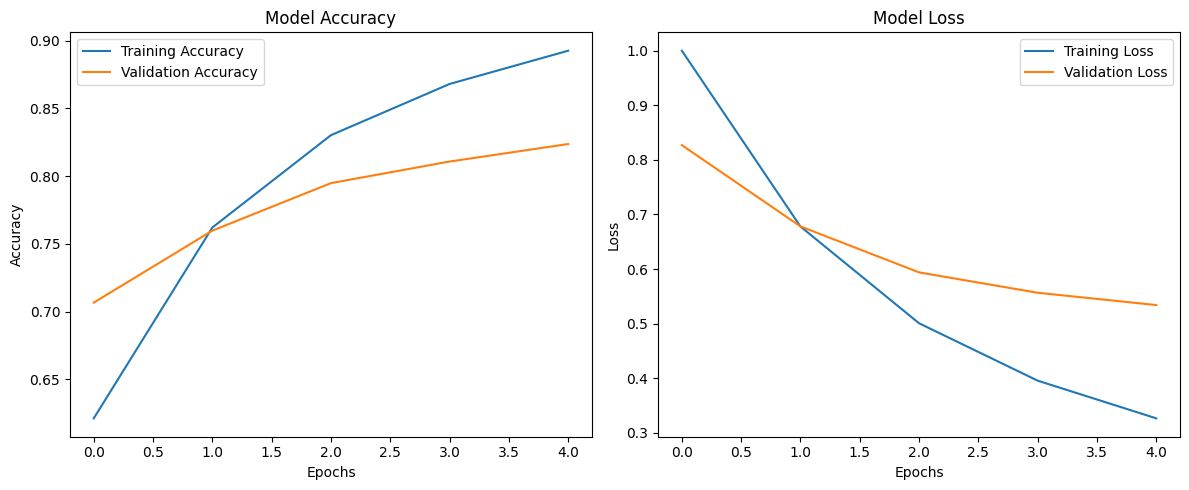

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## **Trying on a custom input value**

In [36]:
def preprocess_input_text(text):

    text = remove_emojis(text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(tokens)


    if not text.strip():
        return "empty"

    return text

def get_sentiment_prediction(input_text):

    cleaned_text = preprocess_input_text(input_text)


    if cleaned_text == "empty":
        print("Input text is empty after preprocessing.")
        return None


    sequences = tokenizer.texts_to_sequences([cleaned_text])

    padded_sequence = pad_sequences(sequences, maxlen=max_length, padding='pre', truncating='post')

    prediction = model.predict(padded_sequence)

    predicted_class = np.argmax(prediction, axis=1)
    sentiment = label_encoder.inverse_transform(predicted_class)

    return sentiment[0]

In [53]:

input_text = "Today it was such a great day, we had so much fun"


predicted_sentiment = get_sentiment_prediction(input_text)


print(f"Predicted Sentiment: {predicted_sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted Sentiment: Positive
